In [2]:
# General
import numpy as np

# Plotting routines
import matplotlib.pyplot as plt

# Qiskit imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Qiskit Aer imports
from qiskit_aer import AerSimulator, Aer
from qiskit_aer.noise import NoiseModel

# Qiskit Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV2 as Sampler, SamplerOptions

from qiskit.compiler import transpile, assemble
from qiskit.transpiler import PassManager, CouplingMap 

from qiskit.circuit.library import GroverOperator

# 3-SAT - grover-intro - Reference  
https://github.com/Qiskit/textbook/blob/main/notebooks/intro/grover-intro.ipynb 

Solution:
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0

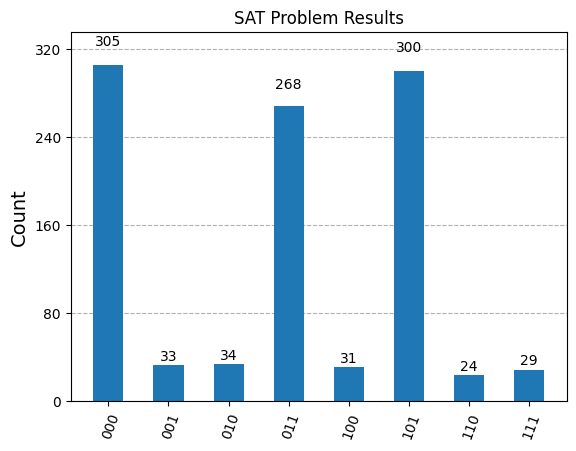

In [6]:

def create_3sat_oracle(clauses):
    """Creates a 3-SAT oracle QuantumCircuit for the given clauses."""
    num_variables = 3  # Given problem has 3 variables
    oracle = QuantumCircuit(num_variables, name='3-SAT Oracle')

    for clause in clauses:
        # Apply X gates to negate literals as needed
        for literal in clause:
            if literal < 0:
                oracle.x(abs(literal) - 1)  # Flip for negated literals

        # Apply CCZ (multi-controlled Z gate) to mark satisfying states
        oracle.h(2)  # Convert Z-basis to X-basis
        oracle.ccx(0, 1, 2)  # Apply CCX (Toffoli) gate
        oracle.h(2)  # Convert back to Z-basis

        # Undo the X gates
        for literal in clause:
            if literal < 0:
                oracle.x(abs(literal) - 1)

    return oracle

# Given 3-SAT problem in DIMACS format
clauses = [
    (-1, -2, -3),
    (1, -2, 3),
    (1, 2, -3),
    (1, -2, -3),
    (-1, 2, 3),
]

# Step 1: Create the correct 3-SAT Oracle
oracle = create_3sat_oracle(clauses)

# Step 2: Initialize the quantum circuit for Grover's algorithm
grover_circ = QuantumCircuit(3, 3)
grover_circ.h([0, 1, 2])  # Apply Hadamard to all qubits

# Step 3: Construct the Grover operator
grover_operator = GroverOperator(oracle)

# Step 4: Apply Grover's algorithm (One Iteration)
grover_circ.compose(grover_operator, inplace=True)

# Step 5: Add NOT gates to flip the result
grover_circ.x([0, 1, 2])  # Apply X gates to all qubits

# Step 6: Measure all qubits
grover_circ.measure([0, 1, 2], [0, 1, 2])

# Step 7: Run on QASM Simulator
backend = Aer.get_backend("aer_simulator")
t_qc = transpile(grover_circ, backend)
result = backend.run(t_qc, shots=1024).result()

# Step 8: Get Results & Plot
counts = result.get_counts()
plot_histogram(counts, title="SAT Problem Results")

# 3-SAT changed Value
(10 points) Now use Grover’s Algorithm to solve a 3-SAT problem for the following DIMACS
Conjunctive Normal Form (CNF). Read in CNF file, use PhaseOracle in QISKIT to build this as
an Oracle. Then use Grover’s algorithm on real quantum computer to solve. (Note this is
different than “Example 3-SAT Problem” on QISKIT
https://github.com/Qiskit/textbook/blob/main/notebooks/intro/grover-intro.ipynb with
two changes shown in yellow)
Solution:
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
-1 2 -3 0
1 -2 -3 0
-1 -2 3 0

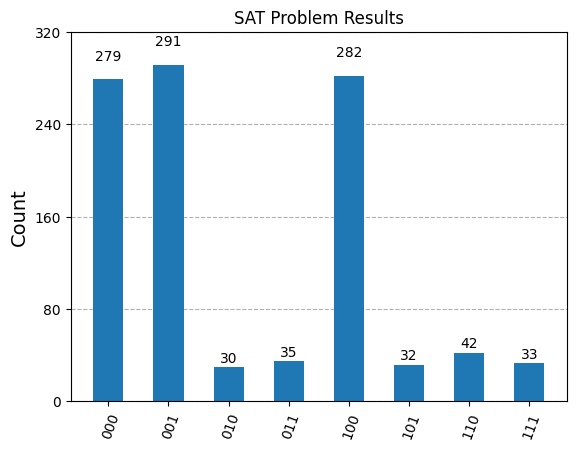

In [7]:

def create_3sat_oracle(clauses):
    """Creates a 3-SAT oracle QuantumCircuit for the given clauses."""
    num_variables = 3  # Given problem has 3 variables
    oracle = QuantumCircuit(num_variables, name='3-SAT Oracle')

    for clause in clauses:
        # Apply X gates to negate literals as needed
        for literal in clause:
            if literal < 0:
                oracle.x(abs(literal) - 1)  # Flip for negated literals

        # Apply CCZ (multi-controlled Z gate) to mark satisfying states
        oracle.h(2)  # Convert Z-basis to X-basis
        oracle.ccx(0, 1, 2)  # Apply CCX (Toffoli) gate
        oracle.h(2)  # Convert back to Z-basis

        # Undo the X gates
        for literal in clause:
            if literal < 0:
                oracle.x(abs(literal) - 1)

    return oracle

# Given 3-SAT problem in DIMACS format
clauses = [
    (-1, -2, -3),
    (1, -2, 3),
    (-1, 2, -3),
    (1, -2, -3),
    (-1, -2, 3),
]

# Step 1: Create the correct 3-SAT Oracle
oracle = create_3sat_oracle(clauses)

# Step 2: Initialize the quantum circuit for Grover's algorithm
grover_circ = QuantumCircuit(3, 3)
grover_circ.h([0, 1, 2])  # Apply Hadamard to all qubits

# Step 3: Construct the Grover operator
grover_operator = GroverOperator(oracle)

# Step 4: Apply Grover's algorithm (One Iteration)
grover_circ.compose(grover_operator, inplace=True)

# Step 5: Add NOT gates to flip the result
grover_circ.x([0, 1, 2])  # Apply X gates to all qubits

# Step 6: Measure all qubits
grover_circ.measure([0, 1, 2], [0, 1, 2])

# Step 7: Run on QASM Simulator
backend = Aer.get_backend("aer_simulator")
t_qc = transpile(grover_circ, backend)
result = backend.run(t_qc, shots=1024).result()

# Step 8: Get Results & Plot
counts = result.get_counts()
plot_histogram(counts, title="SAT Problem Results")

# Phase Oracle

In [10]:

def create_3sat_oracle(clauses):
    """Creates a 3-SAT oracle QuantumCircuit for the given clauses."""
    num_variables = 3  # Given problem has 3 variables
    oracle = QuantumCircuit(num_variables, name='3-SAT Oracle')

    for clause in clauses:
        # Apply X gates to negate literals as needed
        for literal in clause:
            if literal < 0:
                oracle.x(abs(literal) - 1)  # Flip for negated literals

        # Apply CCZ (multi-controlled Z gate) to mark satisfying states
        oracle.h(2)  # Convert Z-basis to X-basis
        oracle.ccx(0, 1, 2)  # Apply CCX (Toffoli) gate
        oracle.h(2)  # Convert back to Z-basis

        # Undo the X gates
        for literal in clause:
            if literal < 0:
                oracle.x(abs(literal) - 1)

    return oracle

# Given 3-SAT problem in DIMACS format
clauses = [
    (-1, -2, -3),
    (1, -2, 3),
    (-1, 2, -3),
    (1, -2, -3),
    (-1, -2, 3),
]

# Step 1: Create the correct 3-SAT Oracle
oracle = create_3sat_oracle(clauses)


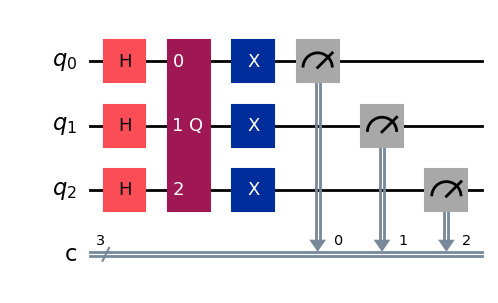

In [11]:

# Step 2: Initialize the quantum circuit for Grover's algorithm
grover_circ = QuantumCircuit(3, 3)
grover_circ.h([0, 1, 2])  # Apply Hadamard to all qubits

# Step 3: Construct the Grover operator
grover_operator = GroverOperator(oracle)

# Step 4: Apply Grover's algorithm (One Iteration)
grover_circ.compose(grover_operator, inplace=True)

# Step 5: Add NOT gates to flip the result
grover_circ.x([0, 1, 2])  # Apply X gates to all qubits

# Step 6: Measure all qubits
grover_circ.measure([0, 1, 2], [0, 1, 2])


grover_circ.draw('mpl')

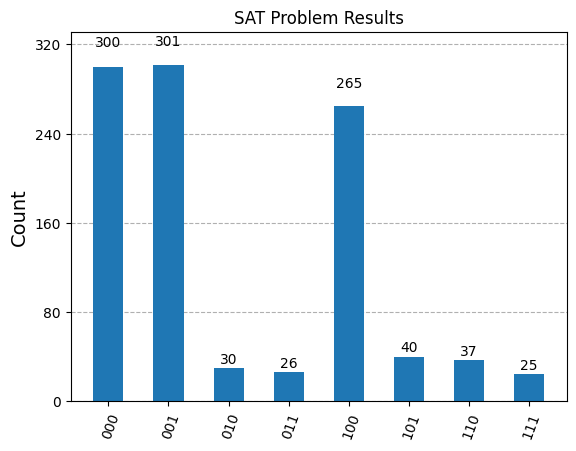

In [12]:

# Step 7: Run on QASM Simulator
backend = Aer.get_backend("aer_simulator")
t_qc = transpile(grover_circ, backend)
result = backend.run(t_qc, shots=1024).result()

# Step 8: Get Results & Plot
counts = result.get_counts()
plot_histogram(counts, title="SAT Problem Results")